# Importing Libraries

In [0]:
import torch
import torch.nn.functional as F
import torch.autograd as Variable
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Neural Network Class


In [0]:
class Net(torch.nn.Module):
    def __init__(self , n_feature , n_hidden , n_output):
        super(Net , self).__init__()
        self.hidden = torch.nn.Linear(n_feature , n_hidden)
       
        self.output = torch.nn.Linear(n_hidden , n_output)
        
    def forward(self , x):
        x = F.relu(self.hidden(x))
        x = F.softmax(self.output(x))
        return x
        

# Creating Object of Class

In [19]:
net = Net(n_feature=17 , n_hidden=10 , n_output=7)
print(net)

Net(
  (hidden): Linear(in_features=17, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=7, bias=True)
)


In [0]:
optimizer = torch.optim.Adam(net.parameters() , lr = 0.01)
loss_func = torch.nn.CrossEntropyLoss()

# Reading from File

In [0]:
data = pd.read_pickle('dataP')

In [22]:
data.head()

,name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


# Data Preprocessing

In [0]:
x = data.drop(['name' , 'class'] , axis = 1)

In [0]:
y = data['class']

In [0]:
y = y - 1

# Splitting of Data

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y , test_size = 0.20, stratify = y)

In [0]:
xtrain = np.asarray(xtrain)
ytrain = np.asarray(ytrain)
xtest = np.asarray(xtest)
ytest = np.asarray(ytest)

In [0]:
xtrain = torch.from_numpy(xtrain)
ytrain = torch.from_numpy(ytrain)
xtest = torch.from_numpy(xtest)
ytest = torch.from_numpy(ytest)

In [0]:
xtrain = xtrain.type(torch.FloatTensor)
ytrain = ytrain.type(torch.LongTensor)
xtest = xtest.type(torch.FloatTensor)
ytest = ytest.type(torch.LongTensor)

# Calculating Accuracy of NN on Training Data 

In [30]:
for i in range(2000):
    predict = net(xtrain)
    loss = loss_func(predict , ytrain)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        
    #print(loss)
    if i % 200 == 0:
        # plot and show learning process
        # plt.cla()
        prediction = torch.max(predict, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = ytrain.data.numpy()
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        print("Loss after Epoch",i,":",loss)
        print("Accuracy after Epoch",i,":",accuracy*100,"%")
        
              

Loss after Epoch 0 : tensor(1.9334, grad_fn=<NllLossBackward>)
Accuracy after Epoch 0 : 33.75 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Loss after Epoch 200 : tensor(1.2497, grad_fn=<NllLossBackward>)
Accuracy after Epoch 200 : 92.5 %
Loss after Epoch 400 : tensor(1.2141, grad_fn=<NllLossBackward>)
Accuracy after Epoch 400 : 95.0 %
Loss after Epoch 600 : tensor(1.2135, grad_fn=<NllLossBackward>)
Accuracy after Epoch 600 : 95.0 %
Loss after Epoch 800 : tensor(1.2133, grad_fn=<NllLossBackward>)
Accuracy after Epoch 800 : 95.0 %
Loss after Epoch 1000 : tensor(1.2132, grad_fn=<NllLossBackward>)
Accuracy after Epoch 1000 : 95.0 %
Loss after Epoch 1200 : tensor(1.2131, grad_fn=<NllLossBackward>)
Accuracy after Epoch 1200 : 95.0 %
Loss after Epoch 1400 : tensor(1.2131, grad_fn=<NllLossBackward>)
Accuracy after Epoch 1400 : 95.0 %
Loss after Epoch 1600 : tensor(1.2131, grad_fn=<NllLossBackward>)
Accuracy after Epoch 1600 : 95.0 %
Loss after Epoch 1800 : tensor(1.2131, grad_fn=<NllLossBackward>)
Accuracy after Epoch 1800 : 95.0 %


# Predicting Accuracy of Test Data

In [31]:
predict = net(xtest)
prediction = torch.max(predict, 1)[1]
pred_y = prediction.data.numpy().squeeze()
target_y = ytest.data.numpy()
accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
#print(loss)
print("Accuracy after Epoch",i,":",accuracy*100,"%")

Accuracy after Epoch 1999 : 95.23809523809523 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


# Displaying Classification Report and Confusion Matrix

In [32]:
print(classification_report(pred_y,target_y))
c=confusion_matrix(target_y, pred_y)
print (c)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

   micro avg       0.95      0.95      0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Plotting Heatmap of Confusion Matrix

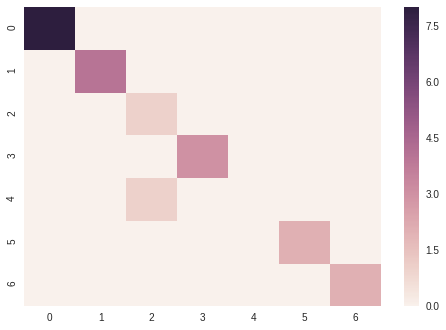

In [33]:
sns.heatmap(c)